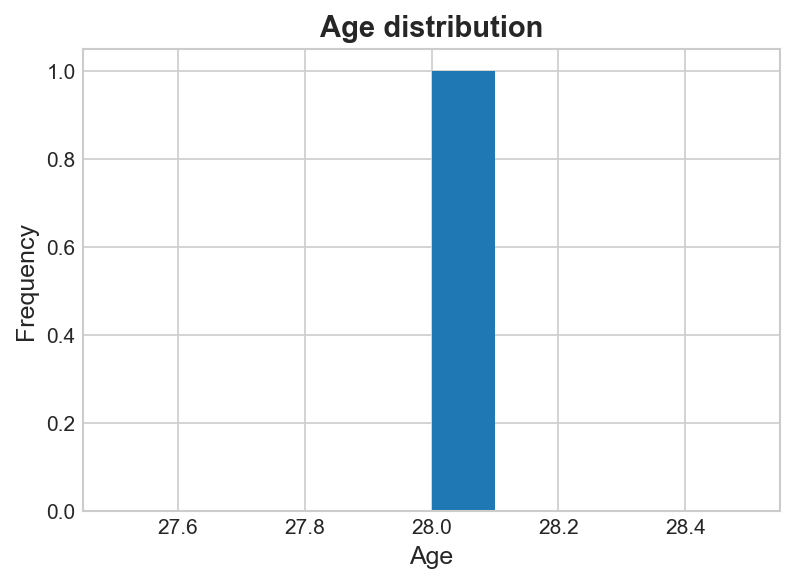

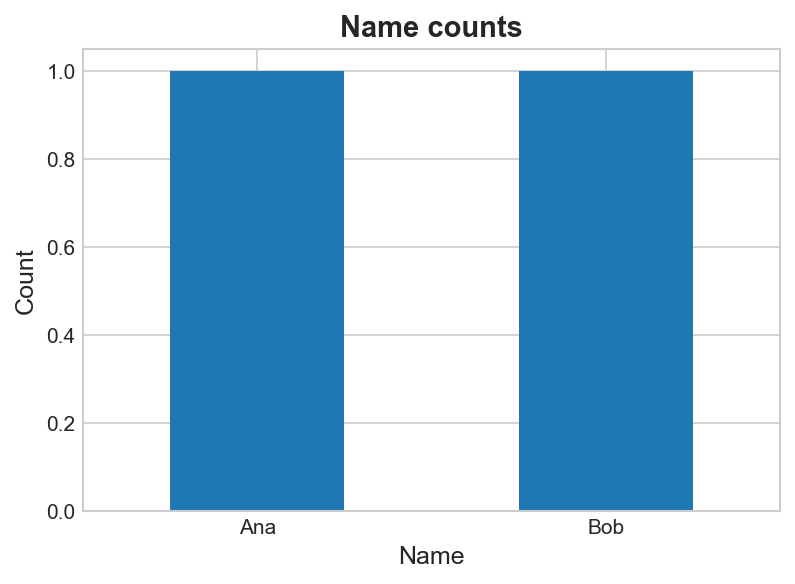

(WindowsPath('C:/Users/sgrant06/Desktop/data-analytics-portfolio'),
 WindowsPath('C:/Users/sgrant06/Desktop/data-analytics-portfolio/docs/eda_ga'),
 WindowsPath('C:/Users/sgrant06/Desktop/data-analytics-portfolio/docs/eda_ga/index.md'),
 WindowsPath('C:/Users/sgrant06/Desktop/data-analytics-portfolio/docs/index.md'))

In [1]:
# --- EDA GA: quick look (plots + docs page) ---

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Paths ----------
# This notebook lives at: <repo>/projects/eda_ga/notebooks/01_eda.ipynb
NB_DIR   = Path.cwd()
REPO     = NB_DIR.parents[2]                    # jump to repo root
OUT_DATA = REPO / "outputs" / "data" / "cleaning_ga"
CLEAN_CSV = OUT_DATA / "cleaned.csv"

PAGES = REPO / "docs" / "eda_ga"                # GitHub Pages target
PAGES.mkdir(parents=True, exist_ok=True)        # make sure it exists

# ---------- Load data ----------
clean = pd.read_csv(CLEAN_CSV)                  # pandas accepts Path-like inputs

# If you prefer reusing earlier variable names:
df = clean

# ---------- Plot styling ----------
# Use a built-in Matplotlib style (no seaborn dependency)
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "figure.dpi": 110,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
})

# ---------- Figure 1: Age distribution ----------
fig1, ax1 = plt.subplots(figsize=(6, 4), dpi=150)
ax1.hist(clean["age"].dropna(), bins=10)
ax1.set_title("Age distribution")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
(fig1).savefig(PAGES / "age_hist.png", dpi=200, bbox_inches="tight")  # high-DPI save

# ---------- Figure 2: Name counts ----------
fig2, ax2 = plt.subplots(figsize=(6, 4), dpi=150)
clean["name"].value_counts(dropna=False).plot(kind="bar", ax=ax2, rot=0)
ax2.set_title("Name counts")
ax2.set_xlabel("Name")
ax2.set_ylabel("Count")
(fig2).savefig(PAGES / "name_counts.png", dpi=200, bbox_inches="tight")  # high-DPI save

plt.show()  # show most recent figure in notebook UI (optional)

# ---------- docs/eda_ga/index.md ----------
REPO_URL = "https://github.com/sharonegrant/data-analytics-portfolio"
eda_index = PAGES / "index.md"
eda_index.write_text(
f"""---
title: EDA GA — Quick look
---

# EDA GA — Quick look

*Notebook:* [{REPO_URL}/blob/main/projects/eda_ga/notebooks/01_eda.ipynb]({REPO_URL}/blob/main/projects/eda_ga/notebooks/01_eda.ipynb)

## Age distribution
![Age distribution](age_hist.png)

## Name counts
![Name counts](name_counts.png)

[⬅ Back to portfolio home](../)
""",
encoding="utf-8"
)

# ---------- docs/index.md (portfolio home) ----------
home = REPO / "docs" / "index.md"
home.parent.mkdir(parents=True, exist_ok=True)
home_contents = f"""# Sharon Grant — Data Analytics Portfolio

- Cleaning GA — Profile 👉 [/data-analytics-portfolio/cleaning_ga/](/data-analytics-portfolio/cleaning_ga/)
- EDA GA — Quick look 👉 [/data-analytics-portfolio/eda_ga/](/data-analytics-portfolio/eda_ga/)
"""
home.write_text(home_contents, encoding="utf-8")

# For convenience, show where files were written
(REPO, PAGES, eda_index, home)
